In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')

In [73]:
#Read the dataset with pandas
df_train = pd.read_csv('./supermarket_sales.csv')

2. THE DEPENDENT VARIABLE IN THIS DATASET IS RATING


2.1 IT IS CLEAR FROM THE DATASET TO SEE THAT IT IS A REGRESSION PROBLEM BECAUSE THE OUTPUT OR DEPENDENT VARIABLE IS A FLOAT QUNATITY


In [74]:
#Show te first 30 data
df_train.head(30)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,NaN,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [75]:
#print the number of rows and columns respectively

print("Number of Rows:",df_train.shape[0])
print("Number of Features:",df_train.shape[1])

Number of Rows: 1000
Number of Features: 17


In [76]:
#see dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   999 non-null    float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

4. DATA CLEANING


In [77]:
#Check for missing values
df_train.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     1
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [80]:
#It seems that Tax_5% has 1 missing value


Hadling Missing Values


Using Mean Method to fix Missing Values in Weight


In [81]:
#Calculate Tax_5% column
df_train['Tax_5%'].mean()

np.float64(15.364525025025024)

In [82]:
#Fill missing values in Tax_5% column with mean
df_train['Tax_5%'].fillna(df_train['Tax_5%'].mean(),inplace=True)

In [83]:
#Check for missing values
df_train.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [84]:
#Check for missing values
df_train.isnull().sum()


Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

Data Analysis


In [85]:
#See descriptive statistics of numerical columns
df_train.describe()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.364525,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.699412,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.428500,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


3. Data Visualization of Numerical Features


In [86]:
#applying Seaborn's default aesthetic settings
sns.set()

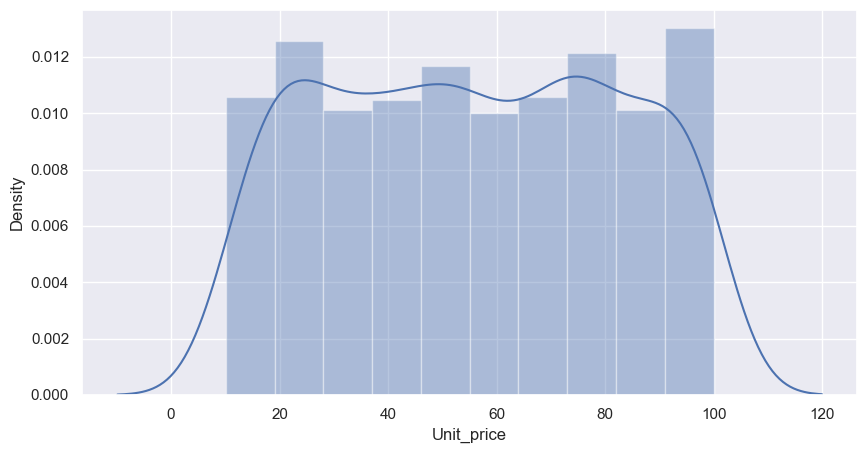

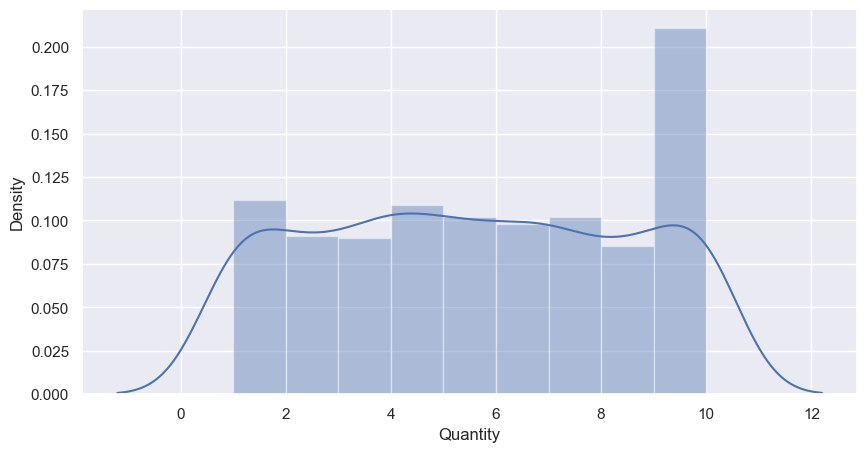

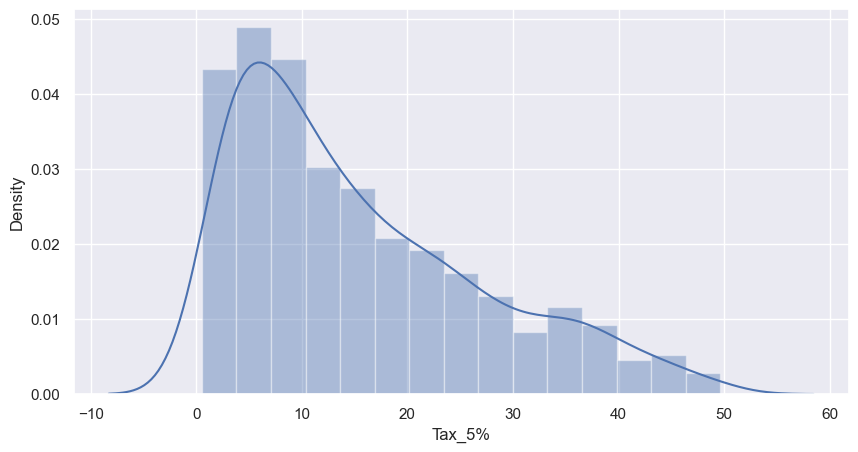

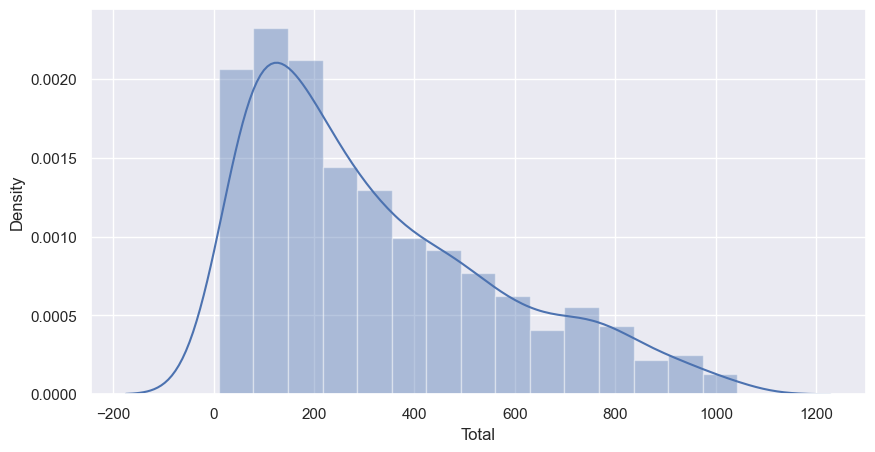

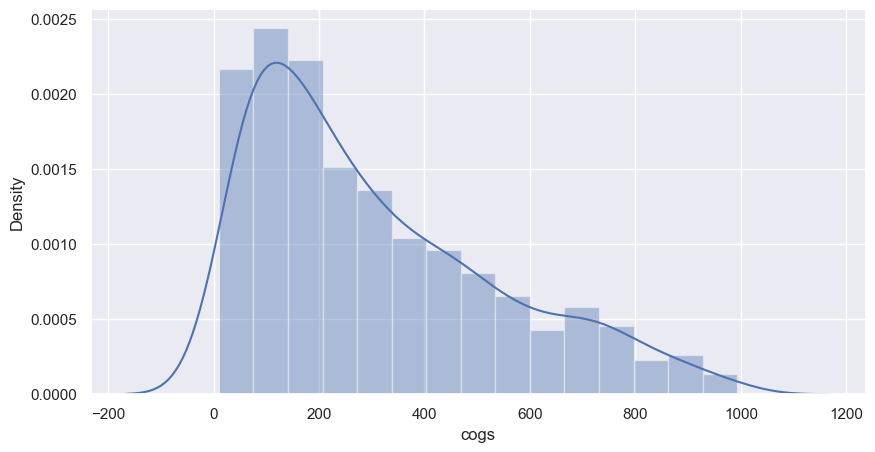

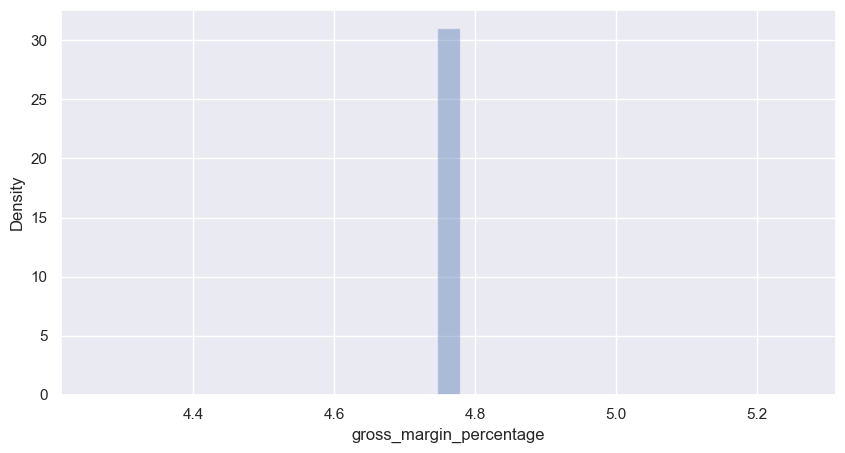

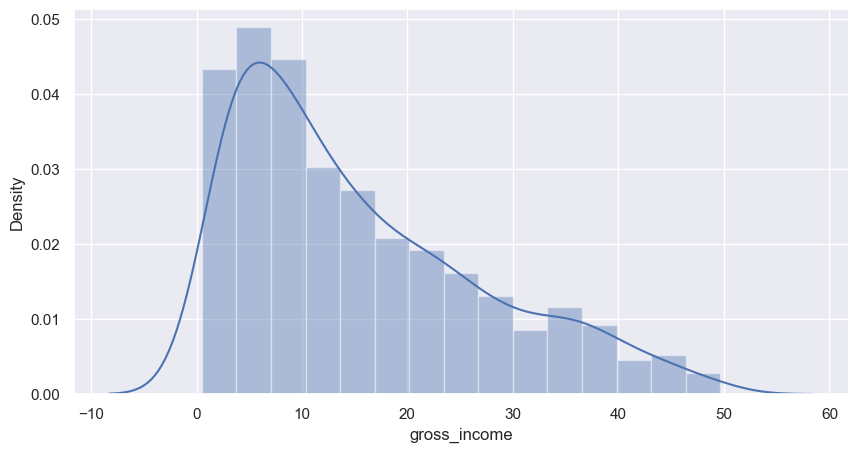

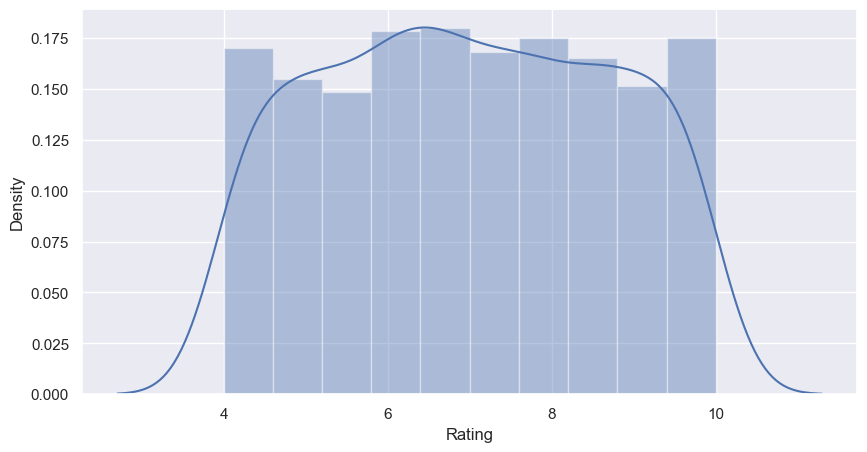

In [87]:
#Plot distplot for numerical columns
cols = ['Unit_price','Quantity','Tax_5%','Total', 'cogs', 'gross_margin_percentage', 'gross_income', 'Rating']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df_train[col])
    plt.show()

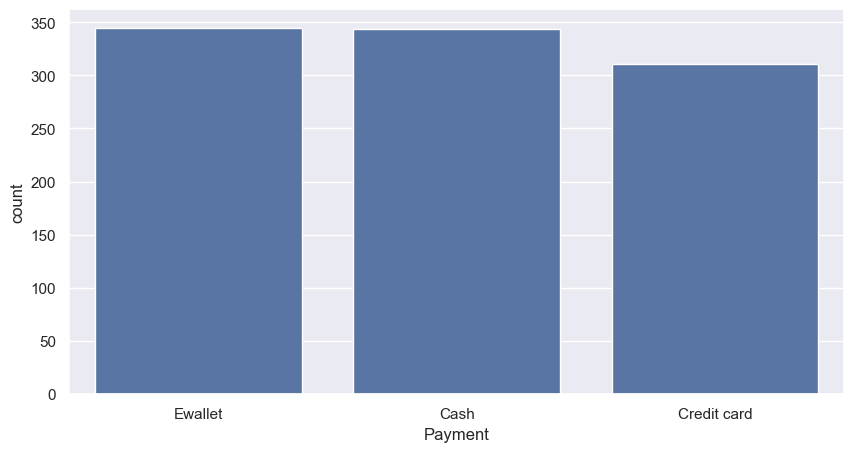

In [88]:
#Plot countplot for Payment column
plt.figure(figsize=(10,5))
sns.countplot(x='Payment', data=df_train)
plt.show()

Data Visualization of Categorical Features


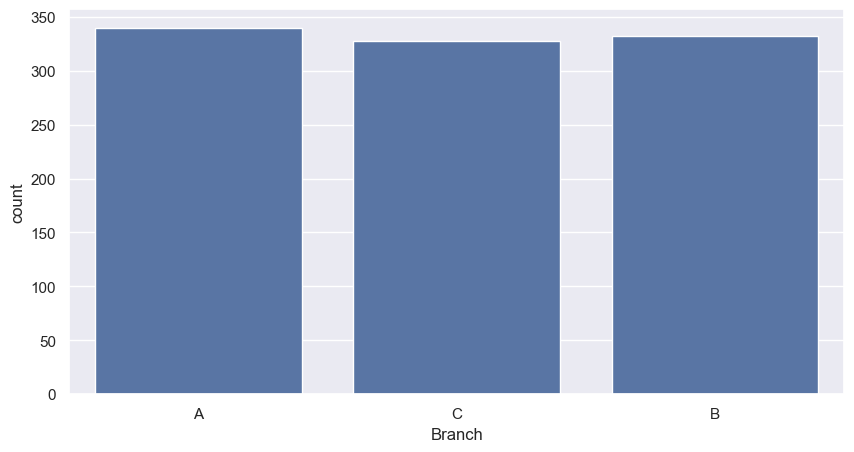

In [89]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Branch" , data=df_train)
plt.show()

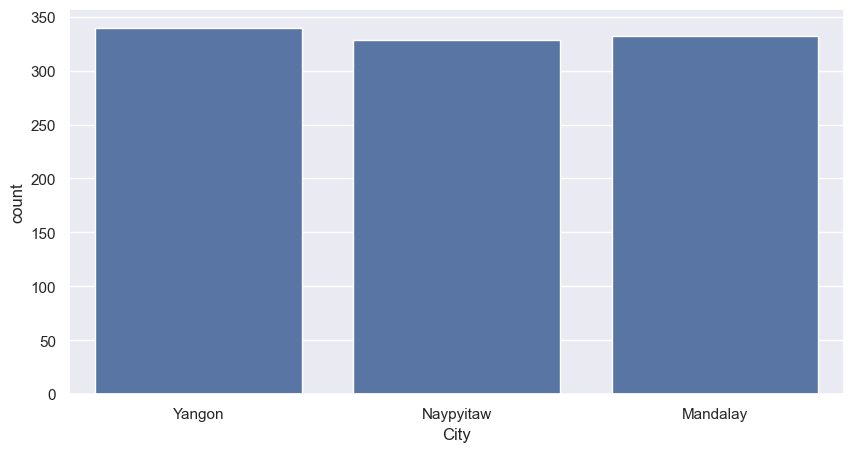

In [92]:
#Plot countplot for City column
plt.figure(figsize=(10,5))
sns.countplot(x= "City" , data=df_train)
plt.show()

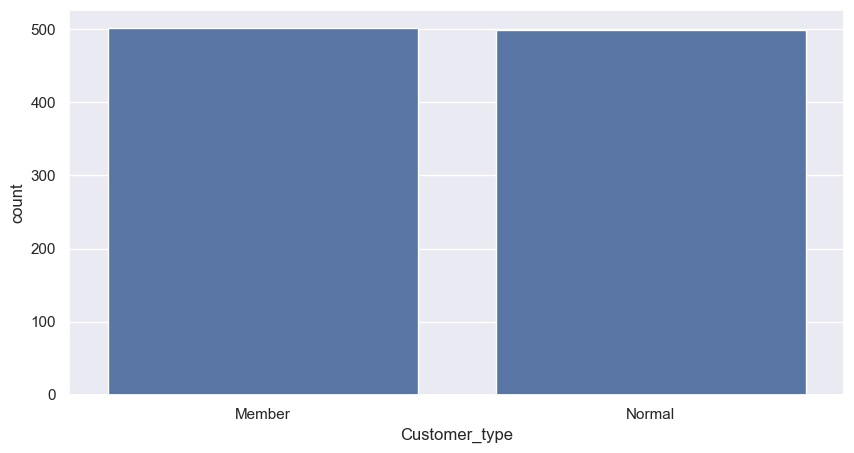

In [93]:
#Plot countplot for Customer type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Customer_type" , data=df_train)
plt.show()

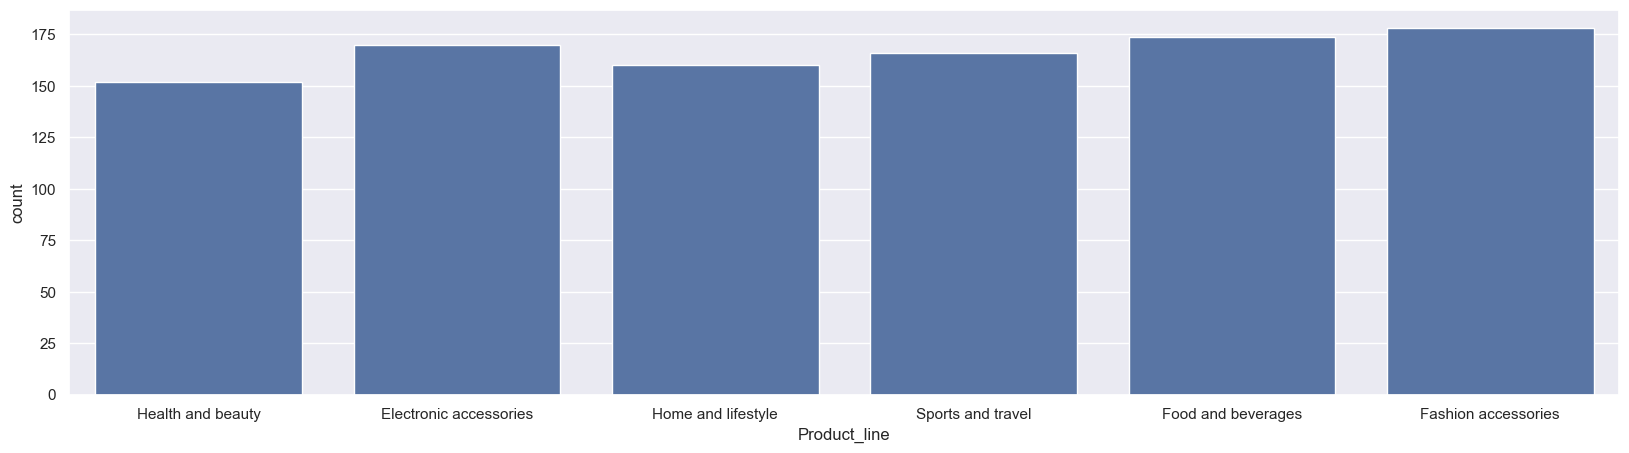

In [94]:
#Plot countplot for Product line column
plt.figure(figsize=(20,5))
sns.countplot(x= "Product_line" , data=df_train)
plt.show()

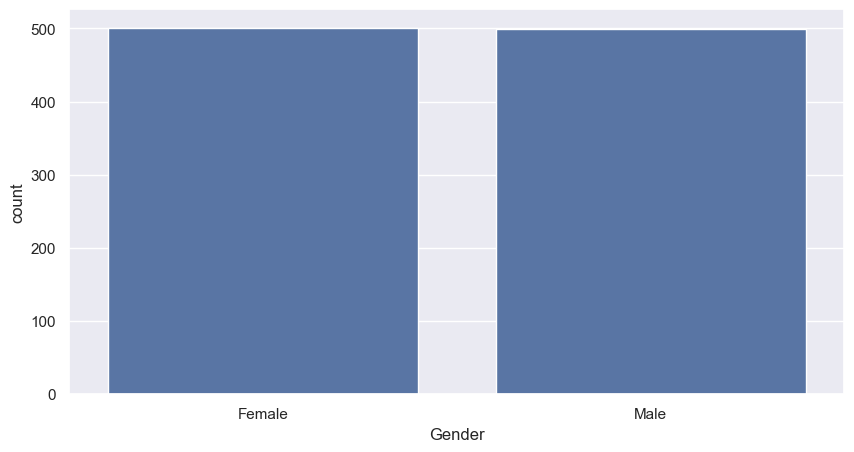

In [95]:
#Plot countplot for Gender column
plt.figure(figsize=(10,5))
sns.countplot(x= "Gender" , data=df_train)
plt.show()

5.0 DATA PREEPROCESSING
5.1 CHANGING STRING VALUES TO INTS OR FLOATS


In [96]:
#see categories in Payment column
df_train['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [97]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

df_train['Branch'] = le.fit_transform(df_train['Branch'])

df_train['City'] = le.fit_transform(df_train['City'])

df_train['Customer_type'] = le.fit_transform(df_train['Customer_type'])

df_train['Gender'] = le.fit_transform(df_train['Gender'])

df_train['Product_line'] = le.fit_transform(df_train['Product_line'])

df_train['Payment'] = le.fit_transform(df_train['Payment'])


In [98]:
df_train.head(10)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.141500,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.820000,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.215500,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.288000,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,15.364525,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3
5,699-14-3026,2,1,1,1,0,85.39,7,29.886500,627.6165,3/25/2019,18:30,2,597.73,4.761905,29.8865,4.1
6,355-53-5943,0,2,0,0,0,68.84,6,20.652000,433.6920,2/25/2019,14:36,2,413.04,4.761905,20.6520,5.8
7,315-22-5665,2,1,1,0,4,73.56,10,36.780000,772.3800,2/24/2019,11:38,2,735.60,4.761905,36.7800,8.0
8,665-32-9167,0,2,0,0,3,36.26,2,3.626000,76.1460,1/10/2019,17:15,1,72.52,4.761905,3.6260,7.2
9,692-92-5582,1,0,0,0,2,54.84,3,8.226000,172.7460,2/20/2019,13:27,1,164.52,4.761905,8.2260,5.9


In [30]:
#The string values has been replaced with numerical values which can be used to train a predictive Model

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   int64  
 2   City                     1000 non-null   int64  
 3   Customer_type            1000 non-null   int64  
 4   Gender                   1000 non-null   int64  
 5   Product_line             1000 non-null   int64  
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   int64  
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

5.2 SEPERATING DEPENDENT AND INDEPENDENT VARIABLES AND STANDARDIZING


Seperating the Features from Label


In [100]:
#sepertate features and target

Features = df_train.drop(columns=['Rating', 'Invoice_ID', 'Date', 'Time'])

Target = df_train['Rating']

In [34]:
Features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,0,2,2
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,1,2,0
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,0,-0.181193,13,1.180783,1,1987,1,2,1
8519,897,-1.059578,1,-0.371154,0,-0.527301,7,2002,1,1,1
8520,1357,-0.534243,0,-0.599784,8,-0.897208,6,2004,1,1,1
8521,681,-1.336444,1,1.532880,13,-0.607977,3,2009,0,2,2


In [101]:
Target


0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

5.3 SPLITTING THE DATA INTO TESTING AND TRAINING


In [102]:
#splittting data into training and testing data
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

In [37]:
#print shape of features and training and testing data of features
print("Shape of Features:",Features.shape)
print("Shape of Features_train:",Features_train.shape)
print("Shape of Features_test:",Features_test.shape)

Shape of Features: (8523, 11)
Shape of Features_train: (6818, 11)
Shape of Features_test: (1705, 11)


In [103]:
#print shape of Target and training and testing data of Target
print("Shape of Target:",Target.shape)
print("Shape of Target_train:",Target_train.shape)
print("Shape of Target_test:",Target_test.shape)

Shape of Target: (1000,)
Shape of Target_train: (800,)
Shape of Target_test: (200,)


THE TASK INVOLVES REGRSSION SO ILL BE TRAINING TWO REGRESSION MODELS XGBREGRESSOR AND SVR


5.4 Building Predictive Models


Building XGBREgressor Model [REGRESSION MODEL]


In [104]:
#build model with XGBRegressor
XGBRModel = XGBRegressor()

#fit the model
XGBRModel.fit(Features_train,Target_train)

#predict the model
Target_pred = XGBRModel.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


R-Squared: -0.40939046442008875
Mean Absolute Error: 1.688567606449127
Mean Squared Error: 4.323728066747948


SVR Model - [REGRESSION MODEL]


In [107]:

import matplotlib.pyplot as plt
import seaborn as sns

#build model with SVLRegressor
model = SVR()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred)
print("Mean Squared Error:",mse)


R-Squared: -0.010894209525267984
Mean Absolute Error: 1.5187124134543684
Mean Squared Error: 3.101221255981617


Saving the predictive models


In [106]:
from joblib import dump
dump(XGBRModel, 'XGBRegressor.joblib')
dump(model, 'svrmodel.joblib')

['svrmodel.joblib']